In [4]:
from fil import time_plot, EasyDF, compute_lag,select_country
import pandas as pd
from datetime import date, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
REGIONI_URL = 'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv'
regioni = EasyDF(pd.read_csv(REGIONI_URL).drop(columns=['stato', 'codice_regione', 'lat', 'long']))

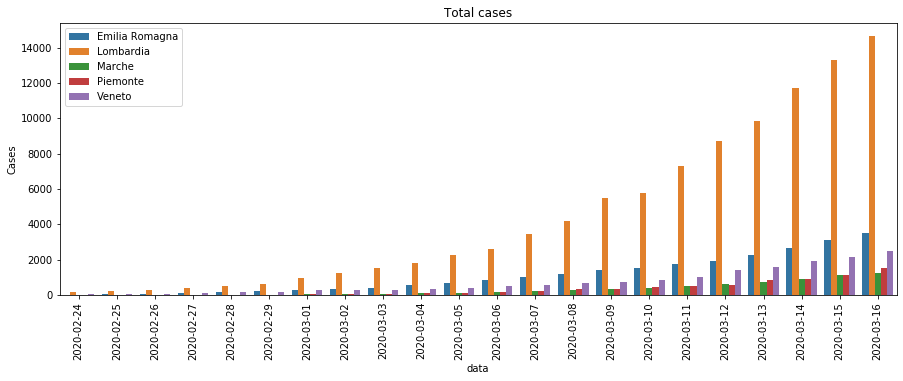

In [8]:
yesterday = date.today() - timedelta(1)
five_most = list(regioni[regioni['data']==yesterday].sort_values(by=['totale_casi']).denominazione_regione)[-5:]
regioni.plot('totale_casi', five_most, title='Total cases')

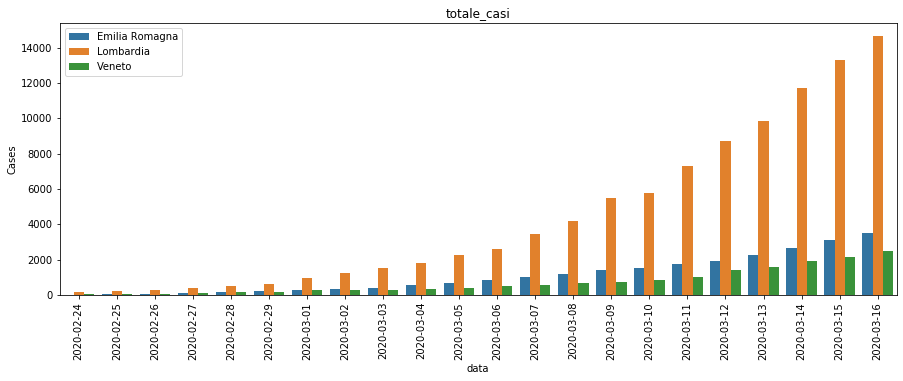

In [9]:
regioni.plot('totale_casi', ['Veneto','Lombardia','Emilia Romagna']);

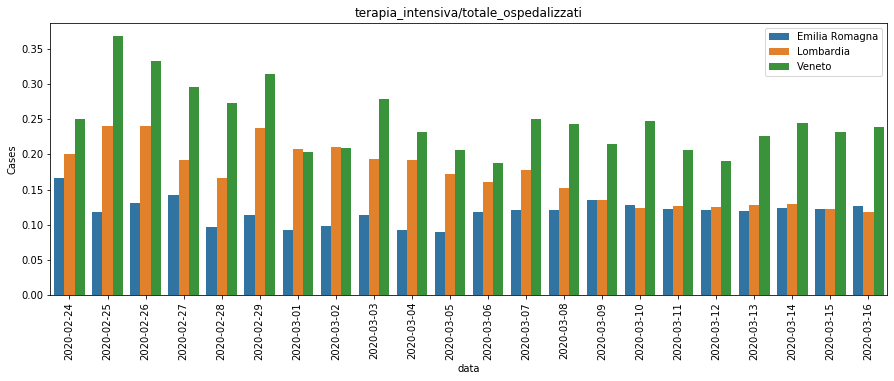

In [10]:
regioni.plot('terapia_intensiva', ['Veneto','Lombardia','Emilia Romagna'],'totale_ospedalizzati');

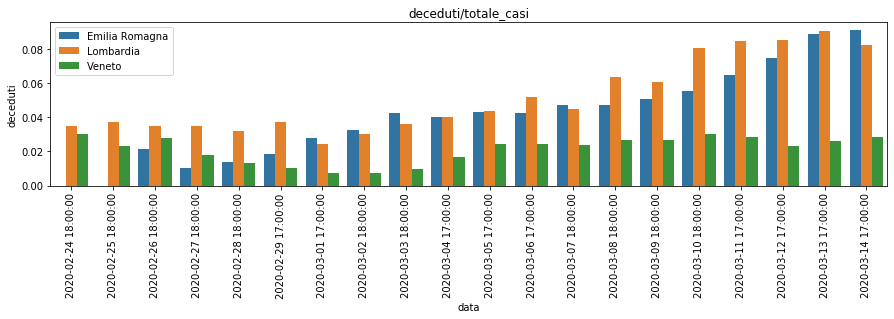

In [4]:
regioni.plot('deceduti', ['Veneto','Lombardia','Emilia Romagna'], 'totale_casi');

In [2]:
print('downloading data...')
CONFIRMED_URL = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
confirmed = pd.read_csv(CONFIRMED_URL)
confirmed['3/12/20'] = (confirmed['3/13/20']+confirmed['3/11/20'])//2
confirmed.index.name = 'Confirmed cases'

DEATHS_URL = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
deaths = pd.read_csv(DEATHS_URL)
deaths['3/12/20'] = (deaths['3/13/20']+deaths['3/11/20'])//2
deaths.index.name = 'Deaths'


downloading data...


In [55]:
series = select_country(confirmed, 'Italy')
series.index = pd.to_datetime(series.index)
x = list(series)
y = series.index

In [55]:
dataframe = confirmed
countries = ['China', 'Italy', 'France']
forced = None
lag = None

    
selected_series = [select_country(dataframe, country) for country in countries]
order = list(reversed(np.argsort([s[-1] for s in selected_series]))) # order by latest number of cases
data = pd.DataFrame()
data = data.append(selected_series[order[0]])

for o in order[1:]:
    series = selected_series[o]
    lag_ = lag or compute_lag(selected_series[order[0]], series)
    shifted = series.shift(-lag_)
    shifted.name = shifted.name + f', {lag_} days behind {countries[order[0]]})'
    data = data.append(shifted)

data = data.transpose()
data = data[data.index > '2020-01-31']

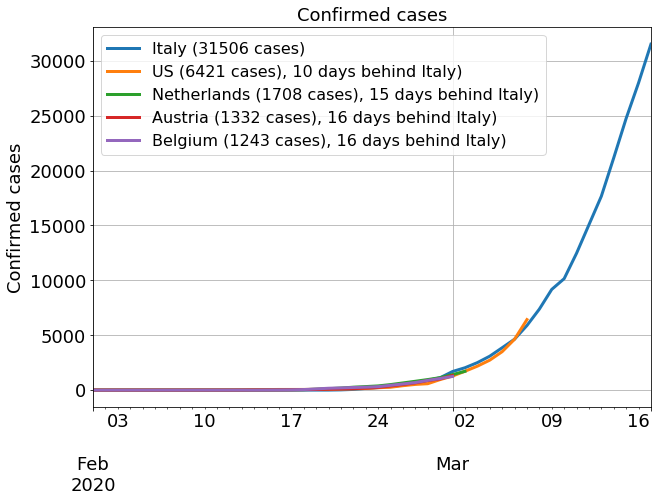

In [70]:
ax = time_plot(confirmed, ['Italy', 'US', 'Austria', 'Belgium', 'Netherlands'])

In [121]:
import matplotlib.dates as mdates

ax = time_plot(confirmed, ['Italy', 'US', 'Austria', 'Belgium', 'Netherlands'])
ax.annotate(str(x[-1])+' cases', (mdates.date2num(y[-1]), x[-1]), xytext=(-100, -3), 
            textcoords='offset points', arrowprops=dict(arrowstyle='->'))

TypeError: '>' not supported between instances of 'Timestamp' and 'str'

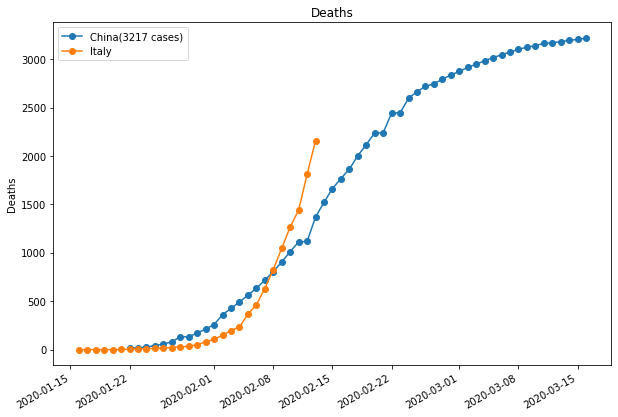

In [15]:
time_plot(deaths, ['China','Italy'], 32)

In [ ]:
def first_dip(lst):

In [ ]:
time_plot(confirmed, ['Italy','US'])